This notebook contains code for the sentiment analysis.

In [115]:
# misc.
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, '..')
import utils

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_palette("deep")
# Set the figure size and resolution
fig = plt.figure(figsize=(10, 8), dpi=300)
sns.set(font_scale=1.2)

# for nlp
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import statsmodels.stats.multicomp as mc
from scipy.stats import f_oneway
import statsmodels.api as sm
import numpy as np

<Figure size 3000x2400 with 0 Axes>

In [116]:
# Get the current working directory path
cwd = os.getcwd()

# Get the path to the data directory
data_path = os.path.dirname(os.path.abspath(cwd)) + "/data"
print(data_path)

/Users/jiayan/Downloads/codes_macs_2022-2023/macs30200/replication-materials-jiayanli/data


In [117]:
# read csv
df_processed = pd.read_csv(data_path + "/processed.csv")

df_processed.head()

,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL,processed_tweet,hashtags
0,0,tewillmott,2019-08-14T23:59:42+00:00,https://twitter.com/tewillmott/status/1161789524902440960,Be your own motivation. Sweat today smile tomorrow \n.\n.\n.\n#health #fitness #fit #fitmom #fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy… https://t.co/R6gFBTUXdT,1.161790e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,be motivation sweat today smile tomorrow,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy']"
1,0,tewillmott,2019-08-14T23:50:39+00:00,https://twitter.com/tewillmott/status/1161787246460096512,Time to kill some FAT 🥵🥵.\n.\n.\n.\n#health #fitness #fit #fitnessmodel #fitnessaddict #fitspo #workout #fitmom #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/eEcKSMXJcr,1.161787e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,time kill fat,"['#health', '#fitness', '#fit', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#fitmom', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth', '#healthychoices']"
2,0,tewillmott,2019-08-14T23:45:06+00:00,https://twitter.com/tewillmott/status/1161785852357308416,Challenge yourself every day.\n..\n.\n.\n#health #fitness #fit #fitmom #fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth… https://t.co/HIJ9VmUohJ,1.161786e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,challenge every day,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessmodel', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth']"
3,0,tewillmott,2019-08-14T23:40:11+00:00,https://twitter.com/tewillmott/status/1161784615822155777,Excuses don’t burn calories.\n..\n.\n.\n#health #fitness #fit #fitmom fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/ZcSW9cTZml,1.161785e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,excuses dont burn calories fitnessmodel,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#healthy', '#instahealth', '#healthychoices']"
4,0,tewillmott,2019-08-14T23:36:21+00:00,https://twitter.com/tewillmott/status/1161783648443482112,Let’s get the legs right.\n.\n.\n#health #fitness #fit #fitmom fitnessmodel #fitnessaddict #fitspo #workout #bodybuilding #cardio #gym #train #training #photooftheday #health #healthy #instahealth #healthychoices… https://t.co/KgZT0f8J7V,1.161784e+18,NaN,NaN,NaN,NaN,NaN,2378977625,239,"Make up artist for film and television. Also do weddings, Prom's make up and any special occasion make up",https://twitter.com/tewillmott,lets get legs right fitnessmodel,"['#health', '#fitness', '#fit', '#fitmom', '#fitnessaddict', '#fitspo', '#workout', '#bodybuilding', '#cardio', '#gym', '#train', '#training', '#photooftheday', '#health', '#health

In [118]:
df_processed.columns

Index(['Period', 'Username', 'Date', 'URL', 'Content', 'TweetID',
       'MentionedUsers', 'Longitude', 'Latitude', 'CountryCode', 'Place',
       'UserID', 'FollowersCount', 'UserDescription', 'UserURL',
       'processed_tweet', 'hashtags'],
      dtype='object')

In [70]:
utils.show_random_5(df_processed, ["processed_tweet", "hashtags"])

processed_tweet                                                                                                                                                                        one year ago today
hashtags           ['#autohash', '#people', '#victory', '#competition', '#sport', '#mcm', '#fit', '#fitfam', '#fitspo', '#fitness', '#championship', '#crowd', '#winner', '#game', '#squad', '#portrait']
Name: 2280, dtype: object
processed_tweet                                                                                                                                                                                                                                                                                     light sess
hashtags           ['#cardio', '#cardiotwitter', '#jumpingrope', '#bodybuilding', '#fitfam', '#fit', '#fitlife', '#fitnessjourney', '#fitnesslifestyle', '#stayfit', '#wednesdaymotivation', '#wednesdaywisdom', '#wednesdaythoughts', '#workoutmotivation', '#crossfit', '

# Sentiment Analysis

## VADER Sentiment Analysis

In [119]:
# Download VADER lexicon
# nltk.download('vader_lexicon')

# Initialize VADER analyzer
sid = SentimentIntensityAnalyzer()

In [120]:
# Define a function to apply the analyzer to each tweet and return the sentiment score
def get_sentiment_score(tweet):
    scores = sid.polarity_scores(tweet)
    return scores['compound']

# Apply the function to each tweet in the dataset and add the sentiment score as a new column
df_processed.dropna(subset=['processed_tweet'], inplace=True) # make sure no null
df_processed['sentiment_score'] = df_processed['processed_tweet'].apply(get_sentiment_score)

In [121]:
# Define a function to label each tweet as positive, negative, or neutral based on the sentiment score
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each sentiment score and add the sentiment label as a new column
df_processed['sentiment_label'] = df_processed['sentiment_score'].apply(get_sentiment_label)

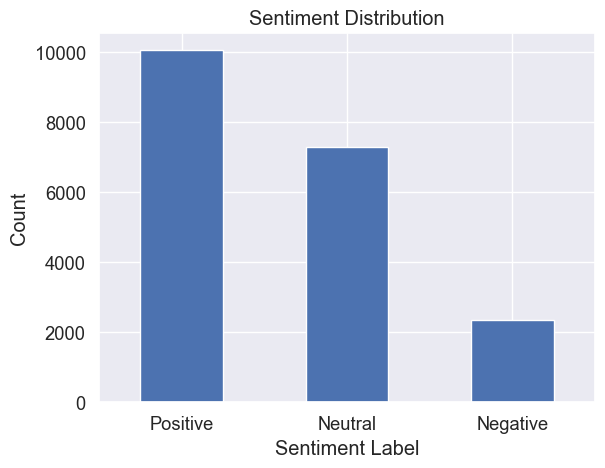

In [122]:
sentiment_counts = df_processed['sentiment_label'].value_counts()

# Create bar plot of sentiment counts
ax = sentiment_counts.plot.bar()

# Set the labels for each bar
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0)

# Set plot title and axis labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

#plt.xticks(['Positive', 'Neutral', 'Negative'])

plt.savefig('visualization/sentiment_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [123]:
# Convert 'Period' column to int
df_processed['Period'] = df_processed['Period'].astype(int)

In [124]:
df_processed[df_processed['Period']==0]['sentiment_label'].value_counts()

sentiment_label
positive    6239
neutral     4441
negative    1425
Name: count, dtype: int64

In [125]:
sentiment_counts = df_processed.groupby('Period')['sentiment_label'].value_counts()
sentiment_counts

Period  sentiment_label
0       positive           6239
        neutral            4441
        negative           1425
1       positive           3074
        neutral            2348
        negative            744
2       positive            739
        neutral             511
        negative            175
Name: count, dtype: int64

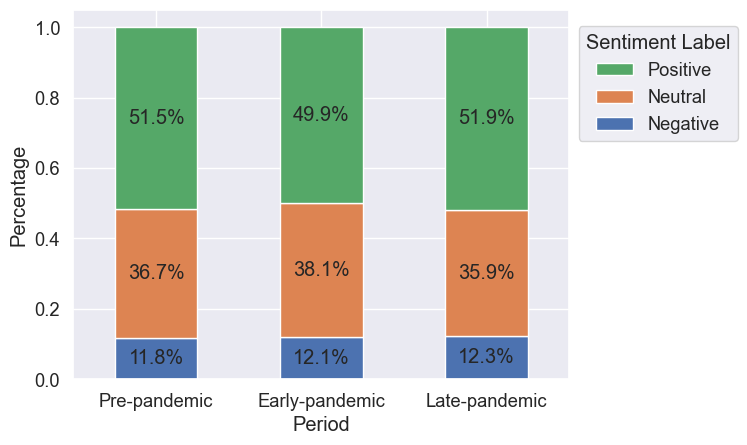

In [126]:
# Normalize the counts
normalized_counts = sentiment_counts.groupby('Period').apply(lambda x: x / float(x.sum()))

# Reshape the data into a pivot table
pivot_table = normalized_counts.unstack(level='sentiment_label')

ax = pivot_table.plot(kind="bar", stacked=True)

# Add percentage labels on the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Customize the plot
# plt.title("Sentiment Distribution in Each Period")
plt.xlabel("Period")
plt.ylabel("Percentage")
# plt.legend(title="Sentiment Label")
# Set the labels for each bar
ax.set_xticklabels(['Pre-pandemic', 'Early-pandemic', 'Late-pandemic'], rotation=0)

# Change the legend labels and their order
legend_labels = ['Positive', 'Neutral', 'Negative']
handles, labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]  # Reorder the handles
plt.legend(handles, legend_labels, title="Sentiment Label", loc='center left', bbox_to_anchor=(1, 0.8))

# Save the plot to a file
plt.savefig('visualization/sentiment_distribution_by_period.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [286]:
# inspect random sentiment score and label
utils.show_random_5(df_processed, ['sentiment_score', 'sentiment_label'])

sentiment_score        0.0
sentiment_label    neutral
Name: 14386, dtype: object
sentiment_score        0.0
sentiment_label    neutral
Name: 3373, dtype: object
sentiment_score      0.4215
sentiment_label    positive
Name: 4102, dtype: object
sentiment_score      0.5859
sentiment_label    positive
Name: 4688, dtype: object
sentiment_score      0.4767
sentiment_label    positive
Name: 7322, dtype: object


In [287]:
# inspect the positive tweets
utils.show_random_5(df_processed[df_processed['sentiment_label']=='positive'], ['processed_tweet', 'sentiment_label'])

processed_tweet    hanman fitness wishes members staff happy eid
sentiment_label                                         positive
Name: 442, dtype: object
processed_tweet    exipure potent natural formula peoples weight loss official website
sentiment_label                                                               positive
Name: 18603, dtype: object
processed_tweet    i made kitchen scratch im tryna look like back ice tray memfitdre
sentiment_label                                                             positive
Name: 7849, dtype: object
processed_tweet    awesome class thanks coach level up fitness virtual classes seven days week dm trainwithlevelup find u join us
sentiment_label                                                                                                          positive
Name: 15322, dtype: object
processed_tweet    haven deadlifted months pulled hexbar hexbar lbs counting lol
sentiment_label                                                         positive

In [288]:
# inspect the neutral tweets
utils.show_random_5(df_processed[df_processed['sentiment_label']=='neutral'], ['processed_tweet', 'sentiment_label'])

processed_tweet    keep believing power you
sentiment_label                     neutral
Name: 7003, dtype: object
processed_tweet    hamstring injuries common soccer australian football rugby cricket athletics amp sports require running sudden acceleration
sentiment_label                                                                                                                        neutral
Name: 19250, dtype: object
processed_tweet    women gloves
sentiment_label         neutral
Name: 18910, dtype: object
processed_tweet       amen
sentiment_label    neutral
Name: 5716, dtype: object
processed_tweet    a seed grows with
sentiment_label              neutral
Name: 3163, dtype: object


In [289]:
# inspect the negative tweets
utils.show_random_5(df_processed[df_processed['sentiment_label']=='negative'], ['processed_tweet', 'sentiment_label'])

processed_tweet    embrace we dont care look like messy hair sweatpants means youre crushing goals
sentiment_label                                                                           negative
Name: 10882, dtype: object
processed_tweet    couldnt help crossfitters forgive
sentiment_label                             negative
Name: 954, dtype: object
processed_tweet    abs hard work difficult muscle body fat body water layers top they prevent visibility six pack check nutrition videos learn
sentiment_label                                                                                                                       negative
Name: 15918, dtype: object
processed_tweet    hell yeah good job i always look empower fellow ladies
sentiment_label                                                  negative
Name: 955, dtype: object
processed_tweet    lack fixed lack not much
sentiment_label                    negative
Name: 9156, dtype: object


## Check between-period difference

Based on the descriptive data above, we can observe that the mean compound score of sentiment is highest for late-pandemic fitpiration tweets, followed by pre-pandemic and then early-pandemic. This suggests that, on average, late-pandemic fitpiration tweets are more positive than pre-pandemic ones, with early-pandemic tweets being the least optimistic.

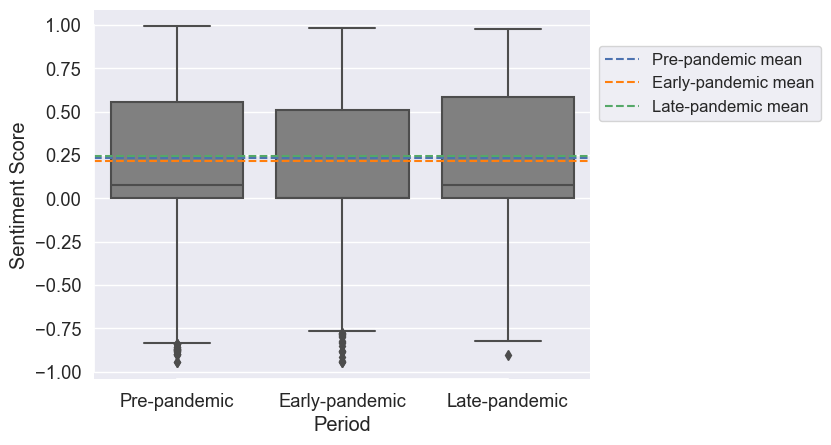

In [127]:
# Create a box plot to compare the three groups
ax = sns.boxplot(x='Period', y='sentiment_score', data=df_processed, color='gray')
sns.despine(trim=True)

# Set the x-axis tick labels
ax.set_xticklabels(['Pre-pandemic', 'Early-pandemic', 'Late-pandemic'])

# Calculate the mean of each group
means = df_processed.groupby('Period')['sentiment_score'].mean()

# Add horizontal lines for the mean of each group
plt.axhline(y=means[0], color='b', linestyle='--', label='Pre-pandemic mean')
plt.axhline(y=means[1], color='#FF7F0E', linestyle='--', label='Early-pandemic mean')
plt.axhline(y=means[2], color='g', linestyle='--', label='Late-pandemic mean')

# Add a title and axis labels
# plt.title('Comparison of Sentiment Scores between Three Pandemic Periods')
plt.xlabel('Period')
plt.ylabel('Sentiment Score')

# Add the legend
# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8), fontsize='small')
#ax.legend(bbox_to_anchor=(0.68, 0.8), fontsize='small', borderaxespad=0.1, frameon=False)

# Save the figure
plt.savefig('visualization/sentiment_scores.png', bbox_inches='tight')

# Show the plot
plt.show()

In [128]:
df_processed.groupby('Period').sentiment_score.describe()

,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
0,12105.0,0.233703,0.369167,-0.9468,0.0,0.0772,0.5574,0.9917
1,6166.0,0.217379,0.366428,-0.9468,0.0,0.0000,0.5106,0.9801
2,1425.0,0.243947,0.390125,-0.9022,0.0,0.0772,0.5859,0.9753


In [292]:
df_pre = df_processed[df_processed['Period'] == 0]
df_early = df_processed[df_processed['Period'] == 1]
df_late = df_processed[df_processed['Period'] == 2]

ANOVA (Analysis of Variance) test to determine whether there is a statistically significant difference between the three groups

In [293]:
# Convert Period column from string to integer
df_processed['Period'] = df_processed['Period'].astype(int)

# Extract the sentiment scores for each period
period_0 = df_pre['sentiment_score']
period_1 = df_early['sentiment_score']
period_2 = df_late['sentiment_score']

# Perform an ANOVA test
f_stat, p_value = f_oneway(period_0, period_1, period_2)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 5.177348548258085
p-value: 0.00565063198232561


p-value is smaller the chosen significance level (0.05). Therefore, I performed post-hoc tests (Tukey's HSD) to determine which pairs of groups have a significant difference in means.

In [294]:
# Define the groups to compare
groups = [0, 1, 2]

# Create a list of Series—the sentiment scores for each group
data = [df_processed[df_processed['Period'] == i]['sentiment_score'] for i in groups]

# Perform Tukey's HSD test
tukey = mc.MultiComparison(np.concatenate(data), 
                           np.concatenate([np.zeros(len(data[i])) + i 
                                           for i in range(len(data))]))
result = tukey.tukeyhsd()

# Print the results
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0163 0.0133 -0.0299 -0.0028   True
   0.0    2.0   0.0102 0.5839  -0.014  0.0345  False
   1.0    2.0   0.0266 0.0386  0.0011   0.052   True
----------------------------------------------------


The test shows that:

- The mean sentiment score for Period 0 is significantly different from that of Period 1, with a p-value of 0.0133.
- The mean sentiment score for Period 0 is not significantly different from that of Period 2, with a p-value of 0.5839.
- The mean sentiment score for Period 1 is not significantly different from that of Period 2, with a p-value of 0.0386.

Therefore, we can conclude that there is a significant difference in sentiment scores between Pre- and Early-pandemic, but not between Period 0 and Period 2, or between Period 1 and Period 2. 

Pre-pandemic tweets have a **significantly more positive** sentiment than early-pandemic.

## Check in-period trends

In [129]:
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

Significant period for Period 1: (Timestamp('2020-03-01 00:03:38+0000', tz='UTC'), Timestamp('2020-12-25 23:44:34+0000', tz='UTC'))


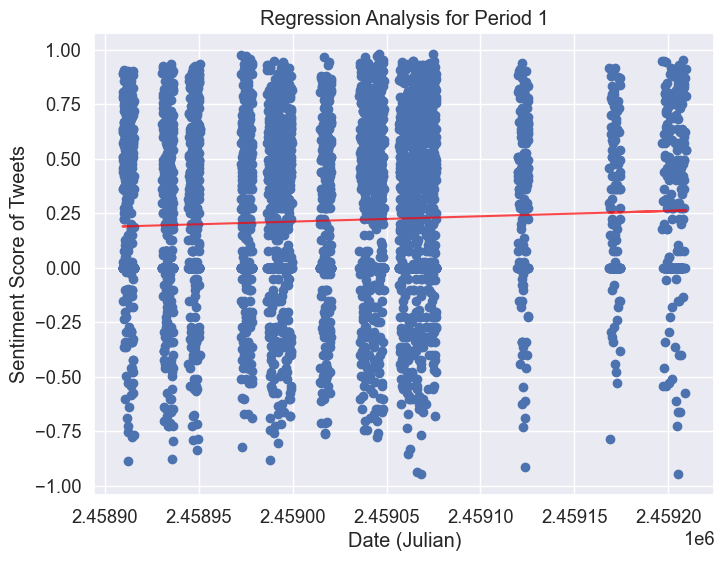

                 start_date                  end_date     slope   intercept   
0 2019-03-01 00:00:55+00:00 2019-12-18 23:54:26+00:00  0.000063 -153.978874  \
1 2020-03-01 00:03:38+00:00 2020-12-25 23:44:34+00:00  0.000245 -601.876504   
2 2022-03-01 05:08:27+00:00 2022-12-18 23:00:53+00:00  0.000076 -186.459996   

    r_value   p_value   std_err  
0  0.000188  0.130930  0.000042  
1  0.002248  0.000196  0.000066  
2  0.000288  0.522291  0.000119  


In [130]:
# create a new DataFrame to store the results
results = pd.DataFrame()

# loop through the groups and perform the regression analysis
for name, group in df_processed.groupby('Period'):
    group.set_index(group['Date'], inplace=True)
    if len(group.index) > 0:
        x = sm.add_constant(list(group.index.to_julian_date())) # convert date to Julian date and add constant
        y = list(group['sentiment_score'])

        model = sm.OLS(y, x, missing='drop')
        fitted = model.fit()
            
        results = pd.concat([results, pd.DataFrame({'start_date': group.index.min(), 
                                                    'end_date': group.index.max(),
                                                    'slope': fitted.params[1], 
                                                    'intercept': fitted.params[0], 
                                                    'r_value': fitted.rsquared,
                                                    'p_value': fitted.pvalues[1],
                                                    'std_err': fitted.bse[1]}, 
                                                    index=[0])], ignore_index=True)
        
        # check if the p-value is less than 0.05 (i.e., statistically significant)
        if fitted.pvalues[1] < 0.05:
            significant_period = (group.index.min(), group.index.max()) # get the start and end dates of the significant period
            print(f"Significant period for Period {name}: {significant_period}")
            
            # plot the scatter plot and regression line
            fig, ax = plt.subplots(figsize=(8,6))
            x = list(group.index.to_julian_date())
            ax.scatter(x, y)
            ax.plot(x, fitted.fittedvalues, color='red', alpha=0.7)

            # add labels and title
            ax.set_xlabel('Date (Julian)')
            ax.set_ylabel('Sentiment Score of Tweets')
            ax.set_title(f'Regression Analysis for Period {name}')

            # show the plot
            plt.show()

# print the results
print(results)

Among the three identified periods, only the early-pandemic period displays a statistically significant increase in the sentiment score over time within that period. However, the rate of increase is minimal.

## Check two-month periods

In [297]:
# Convert 'Date' column to datetime
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

utils.show_random_5(df_processed, 'Date')

2019-09-02 18:06:36+00:00
2019-05-24 04:25:50+00:00
2019-03-04 03:25:38+00:00
2020-09-28 01:13:40+00:00
2019-07-08 17:56:00+00:00


In [298]:
# Calculate descriptive statistics
pre_pandemic_stats = pre_pandemic_sentiment.describe()
early_pandemic_stats = early_pandemic_sentiment.describe()
late_pandemic_stats = late_pandemic_sentiment.describe()

# Concatenate the DataFrames
stats_table = pd.concat([pre_pandemic_stats, early_pandemic_stats, late_pandemic_stats], axis=1)
stats_table.columns = ['Pre-Pandemic', 'Early-Pandemic', 'Late-Pandemic']
stats_table

,Pre-Pandemic,Early-Pandemic,Late-Pandemic
count,9.000000,10.000000,10.000000
mean,0.259558,0.239128,0.252518
std,0.013705,0.025514,0.050795
min,0.241297,0.207108,0.144649
25%,0.253692,0.217060,0.236954
50%,0.257501,0.239828,0.249828
75%,0.261297,0.253452,0.277487
max,0.291960,0.284815,0.323900


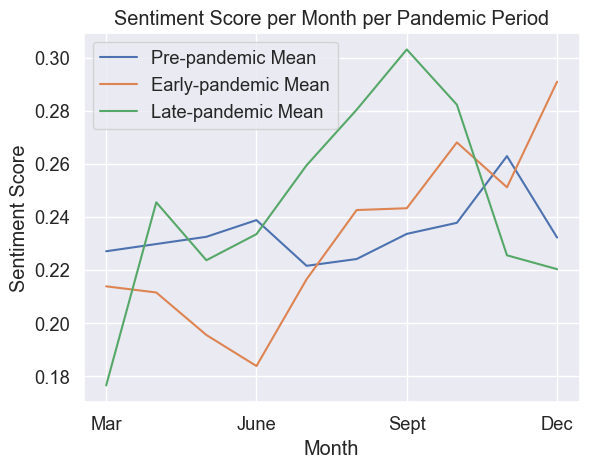

In [299]:
# assuming your dataframe is named df_processed and the date column is named 'Date'
df_processed['Month'] = df_processed['Date'].dt.month

# calculate monthly mean sentiment score for each period
pre_pandemic_sentiment = df_processed[df_processed['Period'] == 0].groupby('Month')['sentiment_score'].mean()
early_pandemic_sentiment = df_processed[df_processed['Period'] == 1].groupby('Month')['sentiment_score'].mean()
late_pandemic_sentiment = df_processed[df_processed['Period'] == 2].groupby('Month')['sentiment_score'].mean()

# plot the means
plt.plot(pre_pandemic_sentiment.index, pre_pandemic_sentiment.values, label='Pre-pandemic Mean')
plt.plot(early_pandemic_sentiment.index, early_pandemic_sentiment.values, label='Early-pandemic Mean')
plt.plot(late_pandemic_sentiment.index, late_pandemic_sentiment.values, label='Late-pandemic Mean')

plt.legend()
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score per Month per Pandemic Period')

# Set custom x-tick labels
plt.xticks([3, 6, 9, 12], ['Mar', 'June', 'Sept', 'Dec'])

plt.savefig('visualization/sentiment_per_month.png', dpi=300, bbox_inches='tight')

plt.show()

In [300]:
# Export the pre-processed dataset
df_processed.to_csv(data_path + '/sentiment.csv', index=False)